# SpinGlassPlots

In [3]:
# imports
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional
import re
import tikzplotlib


cwd = os.getcwd()

In [4]:
#load data
path = 'data'
files = glob.glob(path + '/*.csv')
data_frames = {}
for f in files:
    name = os.path.basename(f).replace('.csv', '')
    temp_df = pd.read_csv(f, sep=";")
    temp_df = temp_df.dropna(axis=1, how='all')
    # create new column with filename
    if temp_df["instance"].dtype == "object":
        temp_df["instance"] = temp_df["instance"].str.replace("_sg.txt", "").astype(int)

    temp_df['filename'] = name
    if name in ["CBFM-P_P4_dwave", "CBFM-P_P16_dwave"]:
        temp_df = temp_df.drop("Unnamed: 0", axis=1)
        temp_df.rename(columns = {'best_dwave':'energy'}, inplace = True)

    # add dataframe to dictionary
    data_frames[name] = temp_df
    print(f'Successfully created dataframe for {name} with shape {temp_df.shape}')

Successfully created dataframe for CBFM-P_P16_dwave with shape (100, 4)
Successfully created dataframe for CBFM-P_P16_truncate2^12 with shape (80, 22)
Successfully created dataframe for CBFM-P_P16_truncate2^16 with shape (22, 22)
Successfully created dataframe for CBFM-P_P4_dwave with shape (100, 4)
Successfully created dataframe for CBFM-P_P4_truncate2^12 with shape (800, 22)
Successfully created dataframe for CBFM-P_P4_truncate2^16 with shape (800, 22)
Successfully created dataframe for CBFM-P_P4_truncate2^8 with shape (800, 22)
Successfully created dataframe for CBFM-P_P8_truncate2^12 with shape (800, 22)
Successfully created dataframe for CBFM-P_P8_truncate2^16 with shape (800, 22)
Successfully created dataframe for CBFM_P12_sb with shape (100, 6)
Successfully created dataframe for CBFM_P16_sb with shape (100, 6)
Successfully created dataframe for CBFM_P4_sb with shape (100, 6)
Successfully created dataframe for CBFM_P8_sb with shape (100, 6)
Successfully created dataframe for RCO_

In [5]:
class UniversalPlotter:
    def __init__(self, data: dict):
        self.data_frames = data

    def plot(self, tables, quantities):
        ...

    def plot_energies(self, *args):
        instance_list = []
        for table in args:
            instances = self.data_frames[table]["instance"].unique()
            instance_list.append(instances)
        instances = min(instance_list, key=len)


        table_energies = {}
        for table in args:
            energy = []
            for i in instances:
                df =  self.data_frames[table]
                best_energy = df[df["instance"] == i].energy.min()
                energy.append(best_energy)
            table_energies[table] = energy

        basis_energy = []
        for i in range(len(instances)):
            best_known = 0
            for table in args:
                if table_energies[table][i] < best_known:
                    best_known = table_energies[table][i]
            basis_energy.append(best_known)


        for table in args:
            energy = table_energies[table]
            energy = [(energy[i]-basis_energy[i])/abs(basis_energy[i]) for i in range(len(instances))]
            plt.scatter(np.arange(1,len(instances)+1,1), energy, label= table)

        plt.xlabel('instance index')
        plt.ylabel('(E - E_best)/|E_best|')

        plt.title("energy comparision")
        plt.legend()
        plt.savefig("plot.pdf")


    def available_tables(self):
        for frame in self.data_frames.keys():
            print(frame)

    def available_quantities(self):
        available = {}
        for name, df in self.data_frames.items():
            for column in df.columns:
                if column in available.keys():
                    available[column].append(name)
                else:
                    available[column] = [name]
        for quantity, tables in available.items():
            print(quantity + ": ", tables)

In [6]:
plotter = UniversalPlotter(data_frames)
plotter.available_tables()
#plotter.available_quantities()

CBFM-P_P16_dwave
CBFM-P_P16_truncate2^12
CBFM-P_P16_truncate2^16
CBFM-P_P4_dwave
CBFM-P_P4_truncate2^12
CBFM-P_P4_truncate2^16
CBFM-P_P4_truncate2^8
CBFM-P_P8_truncate2^12
CBFM-P_P8_truncate2^16
CBFM_P12_sb
CBFM_P16_sb
CBFM_P4_sb
CBFM_P8_sb
RCO_Z3_truncate2^8_i1-5
RCO_Z4_truncate2^8
sb_P16


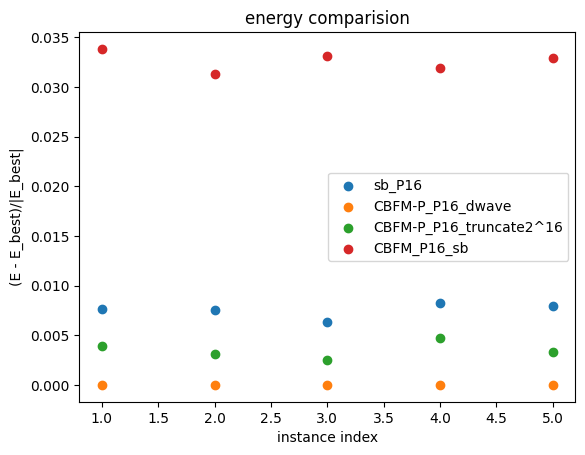

In [7]:
plotter.plot_energies("sb_P16", "CBFM-P_P16_dwave", "CBFM-P_P16_truncate2^16", "CBFM_P16_sb")